# 5.1.4 데이터 불러오기

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
import pandas as pd       # pandas library 불러내기
import numpy as np        # numpy library 불러내기
pd.set_option('display.max_columns', None)   # 결과물로 보여주는 열 갯수 최대화
pd.set_option('display.max_rows', None)      # 결과물로 보여주는 행 갯수 최대화
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Book2/Ch5/healthcare-dataset-stroke-data.csv') 
                                             # 데이터파일을 불러와서 데이터프레임(df)에 저장
df.head(3)                                   # 데이터프레임(df)를 3행까기 보여주기

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.00,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1


In [ ]:
df.shape

(5110, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# 5.1.5 ID 변수 설정

In [ ]:
# 추가 코딩
df['id'].dtypes

dtype('int64')

In [ ]:
df['id'].isnull().sum()   # ID 변수인 id 값의 결측값 확인

0

In [ ]:
# ID 변수인 id 값의 중복 여부를 체크하기 위해 유일한(unique) 값의 개수 체크 

n = len(pd.unique(df['id']))   # pd.unique는 유일한 변수값을 출력하고 len은 값의 개수를 카운트  
print(n)

5110


In [ ]:
# 추가 코딩 
# 숫자형태가 아닌 SERIALNO의 갯수를 세는 파이썬 코드

mask = pd.to_numeric(df['id'], errors='coerce').isna()
a = mask.sum() 
print (a)  

0


# 5.1.7 타겟변수 생성

In [ ]:
# 추가 코딩
df['stroke'].dtype

dtype('int64')

In [ ]:
# 추가 코딩
df['stroke'].isnull().sum()

0

In [ ]:
df['stroke'].value_counts(dropna=False)

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
df['stroke'].value_counts(dropna=False, normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

# 5.1.7 기타 변수 데이터 처리

In [ ]:
cols = ['age','avg_glucose_level','bmi'] # 구간 변수를 cols에 저장
df[cols].dtypes

age                  float64
avg_glucose_level    float64
bmi                  float64
dtype: object

In [ ]:
pd.options.display.float_format = '{:.2f}'.format # 소숫점 2자리로 숫자 표기 제한
df[cols].describe()

,age,avg_glucose_level,bmi
count,5110.00,5110.00,4909.00
mean,43.23,106.15,28.89
std,22.61,45.28,7.85
min,0.08,55.12,10.30
25%,25.00,77.25,23.50
50%,45.00,91.88,28.10
75%,61.00,114.09,33.10
max,82.00,271.74,97.60


In [ ]:
# 추가 코딩
df['age'] > 18   # c는 기준(criterion)의 약자

In [ ]:
c = df['age'] > 18   # c는 기준(criterion)의 약자
df[c].head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.00,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1


In [ ]:
len(df[c])   # df[c]의 자료 개수(행 기준)

4194

In [ ]:
# 추가 코딩
len(df[c]) / len(df)   # df에 대비해서 df[c]의 자료 개수(행 기준) 비율

0.8207436399217222

In [ ]:
df1 = df[c]   # 데이터프레임 df[c]를 df1에 저장

# 추가 코딩
df1.shape

(4194, 12)

In [ ]:
# Residence_type 변수명을 소문자로 시작하게 변경
df1 = df1.rename(columns={'Residence_type' : 'residence_type'}) 

In [ ]:
# 범주형 변수를 cols1에 저장.
cols1 = ['gender', 'hypertension', 'heart_disease', 'ever_married',
        'work_type', 'residence_type', 'smoking_status']
df1[cols1].isnull().sum()

gender            0
hypertension      0
heart_disease     0
ever_married      0
work_type         0
residence_type    0
smoking_status    0
dtype: int64

In [ ]:
df1[cols1].dtypes

gender            object
hypertension       int64
heart_disease      int64
ever_married      object
work_type         object
residence_type    object
smoking_status    object
dtype: object

# 5.1.8 결측값 50% 초과 변수 제거

In [ ]:
# 추가 코딩
df1.isna().any()[lambda x: x]   # 결측값을 갖고 있는 변수명(컬럼명) 찾기

bmi    True
dtype: bool

In [ ]:
# 추가 코딩
# bmi의 결측값 비율 확인

df['bmi'].isnull().mean()

0.03933463796477495

# 5.1.9 요약통계 및 도수분포표 점검

In [ ]:
cols = ['age','avg_glucose_level','bmi'] # 구간 변수를 cols에 저장 
df1[cols].describe()                     # 구간(interval) 변수의 요약통계 구하기

,age,avg_glucose_level,bmi
count,4194.00,4194.00,4014.00
mean,50.66,108.63,30.49
std,17.53,48.00,7.22
min,19.00,55.12,11.30
25%,37.00,77.42,25.50
50%,51.00,92.36,29.30
75%,64.00,116.22,34.20
max,82.00,271.74,92.00


In [ ]:
df1[cols].skew()

age                 0.03
avg_glucose_level   1.45
bmi                 1.24
dtype: float64

In [ ]:
df1[cols].kurtosis()

age                 -1.02
avg_glucose_level    1.09
bmi                  3.45
dtype: float64

In [ ]:
df1['work_type'].value_counts(dropna=False)

Private          2740
Self-employed     804
Govt_job          648
Never_worked        2
Name: work_type, dtype: int64

In [ ]:
pd.crosstab(df1['work_type'], columns='count')   # frequency table 생성(개수 기준)

col_0,count
work_type,
Govt_job,648
Never_worked,2
Private,2740
Self-employed,804


In [ ]:
# 추가 코딩
pd.crosstab(df1['work_type'], columns='ratio', normalize=True)   # frequency table 생성(비율 기준).

col_0,ratio
work_type,
Govt_job,0.15
Never_worked,0.00
Private,0.65
Self-employed,0.19


In [ ]:
# 추가 코딩
pd.crosstab(df1['work_type'], df1['stroke'])   # frequency table 생성(개수 기준)

stroke,0,1
work_type,,
Govt_job,615,33
Never_worked,2,0
Private,2591,149
Self-employed,739,65


In [ ]:
pd.crosstab(df1['work_type'], df1['stroke'], normalize=True)   # frequency table 생성(비율 기준)

stroke,0,1
work_type,,
Govt_job,0.15,0.01
Never_worked,0.00,0.00
Private,0.62,0.04
Self-employed,0.18,0.02


# 5.1.10 이상값 제거

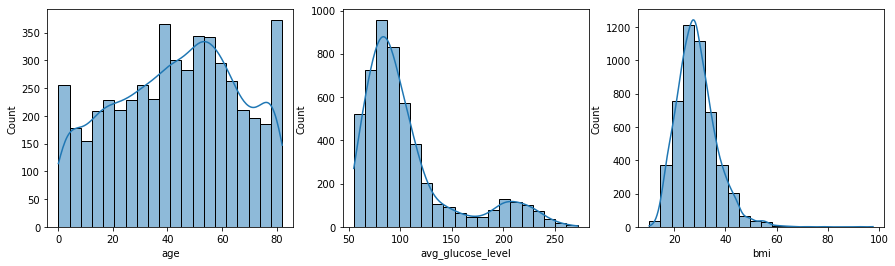

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.histplot(ax=axes[0], data=df, x="age", kde=True, bins=20);
sns.histplot(ax=axes[1], data=df, x="avg_glucose_level", kde=True, bins=20);
sns.histplot(ax=axes[2], data=df, x="bmi", kde=True, bins=20)
plt.show(); 

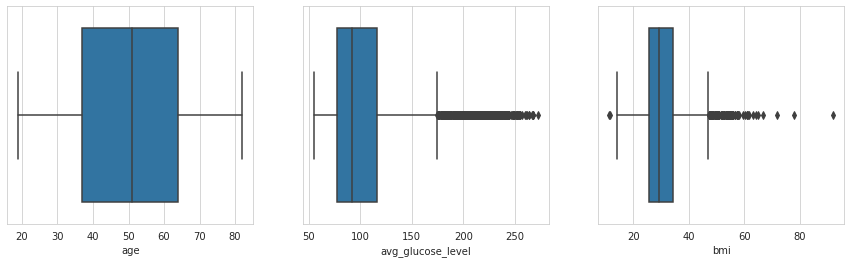

In [ ]:
sns.set_style('whitegrid')

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(ax=axes[0], x = 'age', data = df1) 
sns.boxplot(ax=axes[1], x = 'avg_glucose_level', data = df1) 
sns.boxplot(ax=axes[2], x = 'bmi', data = df1); 

In [ ]:
Q1 = df1[['age','avg_glucose_level','bmi']].quantile(0.25)
Q3 = df1[['age','avg_glucose_level','bmi']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                 27.00
avg_glucose_level   38.80
bmi                  8.70
dtype: float64


In [ ]:
Lower = Q1-3.0*IQR
Upper = Q3+3.0*IQR
print(Lower)

age                 -44.00
avg_glucose_level   -38.99
bmi                  -0.60
dtype: float64


In [ ]:
print(Upper)

age                 145.00
avg_glucose_level   232.64
bmi                  60.30
dtype: float64


In [ ]:
c1 = df1['avg_glucose_level'] <= 232.64
c2 = df1['bmi'] <= 60.3

df2 = df1[c1 & c2]
df2.shape

(3915, 12)

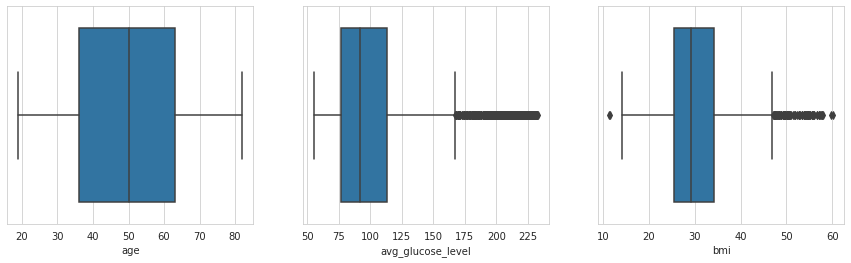

In [ ]:
# 추가 코딩
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(ax=axes[0], x = 'age', data = df2) 
sns.boxplot(ax=axes[1], x = 'avg_glucose_level', data = df2) 
sns.boxplot(ax=axes[2], x = 'bmi', data = df2); 

# 5.1.11 상관관계 검토

In [ ]:
cols = ['age','avg_glucose_level','bmi'] # 구간 변수를 cols에 저장
round(df2[cols].corr(), 2)               # 구간 변수간 상관계수 디스플레이

,age,avg_glucose_level,bmi
age,1.00,0.20,0.02
avg_glucose_level,0.20,1.00,0.16
bmi,0.02,0.16,1.00


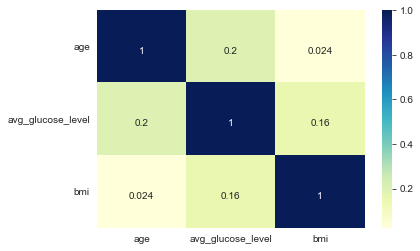

In [ ]:
# 추가 코딩
import seaborn as sns

corr = df2[cols].corr()  
annot_kws = {"ha": 'center',"va": 'top'}
sns.heatmap(data=corr, annot=True, annot_kws=annot_kws, cmap="YlGnBu");

In [ ]:
df2.to_csv('/content/drive/MyDrive/Colab Notebooks/Book2/Ch5/healthcare-dataset-2.csv', index=False) 

# 5.1.13 t-검정

In [47]:
from scipy import stats

data_1 = df2[df2['stroke'] == 1]['age']
data_0 = df2[df2['stroke'] == 0]['age']

stats.ttest_ind(data_1, data_0)   # 결과는 pvalue < 0.05 

Ttest_indResult(statistic=14.84966867789424, pvalue=1.4355395712390346e-48)

In [48]:
# 추가 코딩
from scipy import stats

data_1 = df2[df2['stroke'] == 1]['avg_glucose_level']
data_0 = df2[df2['stroke'] == 0]['avg_glucose_level']

stats.ttest_ind(data_1, data_0)   # 결과는 pvalue < 0.05 

Ttest_indResult(statistic=7.200791069659755, pvalue=7.144119062259364e-13)

In [49]:
# 추가 코딩
from scipy import stats

data_1 = df2[df2['stroke'] == 1]['bmi']
data_0 = df2[df2['stroke'] == 0]['bmi']

stats.ttest_ind(data_1, data_0)   # 결과는 pvalue > 0.05 

Ttest_indResult(statistic=-0.42810612400712617, pvalue=0.6685974193789274)